In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/electric-power-consumption/powerconsumption.csv


## Contexto do dataset:

Tetouan é uma cidade situada no norte do Marrocos que ocupa uma área de cerca de 10375 km² e a sua população é de cerca de 550.374 habitantes, segundo o último Censo de 2014, e está crescendo rapidamente, cerca de 1,96% ao ano. Por estar localizada ao longo do Mar Mediterrâneo, seu clima é ameno e chuvoso no inverno, quente e seco durante os meses de verão.

O consumo de energia per capita do Marrocos é de 0,56 tep (cerca de 42% abaixo da média do norte da África), incluindo cerca de 900 kWh de eletricidade (38% abaixo da média regional) (2020). A progressão do consumo total de energia abrandou entre 2010 e 2019 (+3%/ano, face a 4,5%/ano no período 2000-2010) e diminuiu 7% em 2020 para cerca de 21 Mtep.

A produção nacional de hidrocarbonetos é baixa. Todos os derivados são importados desde o fechamento da única refinaria do país em 2015 (200.000 bbl/d). As importações de derivados de petróleo aumentaram rapidamente de 2015 a 2019 (+6%/ano) e diminuíram 12% em 2020 devido à crise do COVID. Os dados de consumo de energia foram recolhidos do Sistema de Supervisão de Controle e Aquisição de Dados (SCADA) da Amendis que é um operador de serviço público e responsável pela distribuição de água potável e eletricidade, desde 2002, dos consumidores de média tensão nas regiões de Tetouan. Para o efeito, o fornecimento e distribuição de energia elétrica desde o ponto de entrega até ao utilizador final, o cliente, é assegurado pela Amendis. A energia que é distribuída provém do Gabinete Nacional de Electricidade e Água Potável. Depois de transformar a alta tensão (63 kV) em média tensão (20 kV), é permitido transportar e distribuir a energia.

Sendo o consumo de eletricidade tão crucial para o país, a ideia é estudar o impacto no consumo de energia. O conjunto de dados é exaustivo em sua demonstração do consumo de energia da cidade de Tetouan, no Marrocos. A rede de distribuição é alimentada por 3 postos de zona, nomeadamente: Quads, Smir e Boussafou.

## Conteúdo:

Os dados consistem em 52.416 observações de consumo de energia em uma janela de 10 minutos. Cada observação é descrita por 9 colunas de recursos.

* Date Time: Janela de tempo de dez minutos.
* Temperature: Temperatura do tempo.
* Humidity: Umidade do tempo.
* Wind Speed: Velocidade do vento.
* General Diffuse Flows: “fluxo difuso” é um termo genérico para descrever fluidos de baixa temperatura (< 0,2° a ~ 100°C) que descarregam lentamente através de montes de sulfeto, fluxos de lava fraturados e conjuntos de tapetes bacterianos e macrofauna.
* Diffuse Flows
* Zone 1 Power Consumption
* Zone 2 Power Consumption
* Zone 3 Power Consumption

# Importação:

In [2]:
dados = pd.read_csv('/kaggle/input/electric-power-consumption/powerconsumption.csv')
dados.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


Traduzindo as colunas:

In [3]:
colunas = {
    'Datetime' : 'Data_e_hora',
    'Temperature' : 'Temperatura',
    'Humidity' : 'Umidade',
    'WindSpeed' : 'Velocidade_vento',
    'GeneralDiffuseFlows' : 'Fluxos_gerais',
    'DiffuseFlows' : 'Fluxos_difusos',
    'PowerConsumption_Zone1' : 'Consumo_zona1',
    'PowerConsumption_Zone2' : 'Consumo_zona2',
    'PowerConsumption_Zone3' : 'Consumo_zona3'
}

dados = dados.rename(columns = colunas)
dados.head()

,Data_e_hora,Temperatura,Umidade,Velocidade_vento,Fluxos_gerais,Fluxos_difusos,Consumo_zona1,Consumo_zona2,Consumo_zona3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
dados.shape

(52416, 9)

In [5]:
dados.describe()

,Temperatura,Umidade,Velocidade_vento,Fluxos_gerais,Fluxos_difusos,Consumo_zona1,Consumo_zona2,Consumo_zona3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


---
## Explicação:
A descrição do dataset informa que **o Marrocos tem um consumo de energia per capita de 0,56 tep**. 

Vou supor que este valor equivale a um consumo anual de energia, pois encontrei um documento da [epe](https://www.epe.gov.br/sites-pt/publicacoes-dados-abertos/publicacoes/PublicacoesArquivos/publicacao-40/topico-66/Cap2_Texto.pdf) informando o consumo de energia per capita do Brasil, referente a 2016, 2021 e com uma projeção para 2026, em tep. 1,24, 1,29 e 1,41 respectivamente.

Para quem não está familiarizado com o termo, **tep** significa “tonelada equivalente de petróleo”, ou seja, uma unidade de medida utilizada para contabilizar energia de diferentes fontes. (Fonte: [epe](https://www.epe.gov.br/pt/abcdenergia/planejamento-energetico-e-a-epe))

1 tep = 11,63 MWh = 11630 kWh

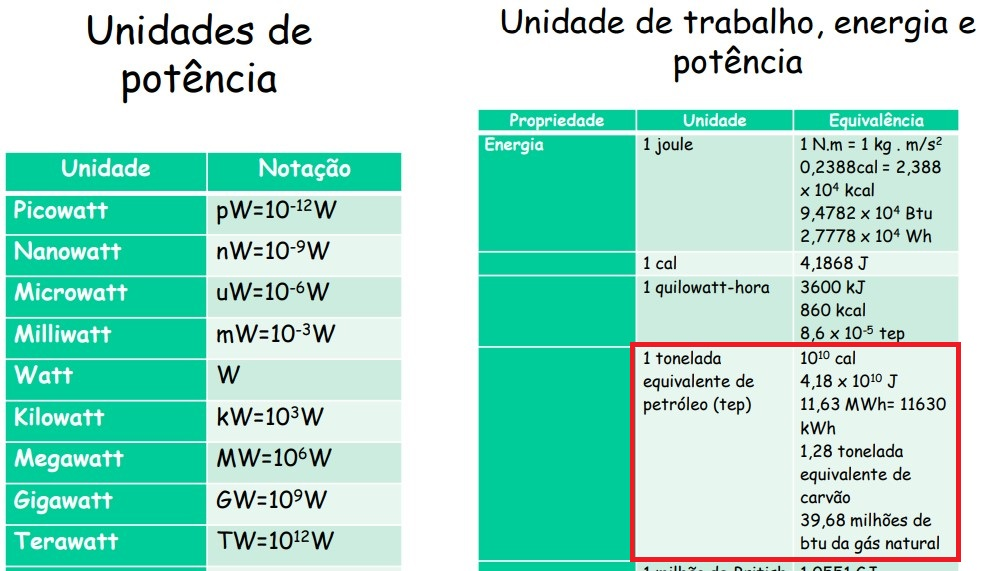

Fonte: [edisciplinas](https://edisciplinas.usp.br/pluginfile.php/205711/mod_resource/content/1/01_Aula_1_Energia_PEA3110.pdf)

In [6]:
per_capita = 0.56
tep = 11630 #kWh

No caso do Marrocos, estima-se que cada habitante consome:

In [7]:
consumo_por_habitante = per_capita * tep
print('{:.2f} kWh'.format(consumo_por_habitante))

6512.80 kWh


A descrição do dataset também informa que a população da cidade de Tetouan é de, aproximadamente, 550.374 habitantes. Então, multipliquei o **consumo por habitante** com a **população da cidade** e obtive:

In [8]:
populacao = 550374
consumo_da_cidade = consumo_por_habitante * populacao
print('{:.2f} kWh'.format(consumo_da_cidade))

3584475787.20 kWh


Ao dividir o **consumo da cidade** por 365, que é a quantidade de dias por ano, tenho:

In [9]:
consumo_da_cidade_por_dia = consumo_da_cidade / 365
print('{:.5f} kWh'.format(consumo_da_cidade_por_dia))

9820481.60877 kWh


Dividindo este valor por 24, que é a quantidade de horas por dia, tenho:

In [10]:
consumo_da_cidade_por_hora = consumo_da_cidade_por_dia / 24
print('{:.5f} kWh'.format(consumo_da_cidade_por_hora))

409186.73370 kWh


Lembrando que os registros do dataset foram feitos a cada 10 minutos, em três subestações localizadas na cidade. Posso chegar a um valor próximo aos dados registrados de algumas formas:
- Posso dividir o **consumo por hora da cidade** por 6, já que 1 hora é composta por 6 ‘grupos’ de 10 minutos;
- Ou posso dividir o **consumo por hora da cidade** por 60, adquirindo o valor do **consumo por minuto da cidade** e depois multiplicar este valor por 10. 

Fazendo a primeira opção, tenho:

In [11]:
consumo_da_cidade_por_10_minutos = consumo_da_cidade_por_hora / 6
print('{:.5f} kWh'.format(consumo_da_cidade_por_10_minutos))

68197.78895 kWh


Na primeira linha do dataset, temos os seguintes valores:

* 34055,69620 para a Zona 1
* 16128,87538 para a Zona 2
* 20240,96386 para a Zona 3

Somando estes valores, temos:

In [12]:
34055.69620 + 16128.87538 + 20240.96386

70425.53543999999

Na segunda linha, temos:

In [13]:
29814.68354 + 19375.07599 + 20131.08434

69320.84387000001

Na terceira linha:

In [14]:
29128.10127 + 19006.68693 + 19668.43373

67803.22193

Ou seja, a soma do consumo das 3 subestações chega a um valor próximo ao que calculei, através do consumo per capita, em tep. Portanto, a unidade de medida para os consumos é de kWh.

---

## Correlação:

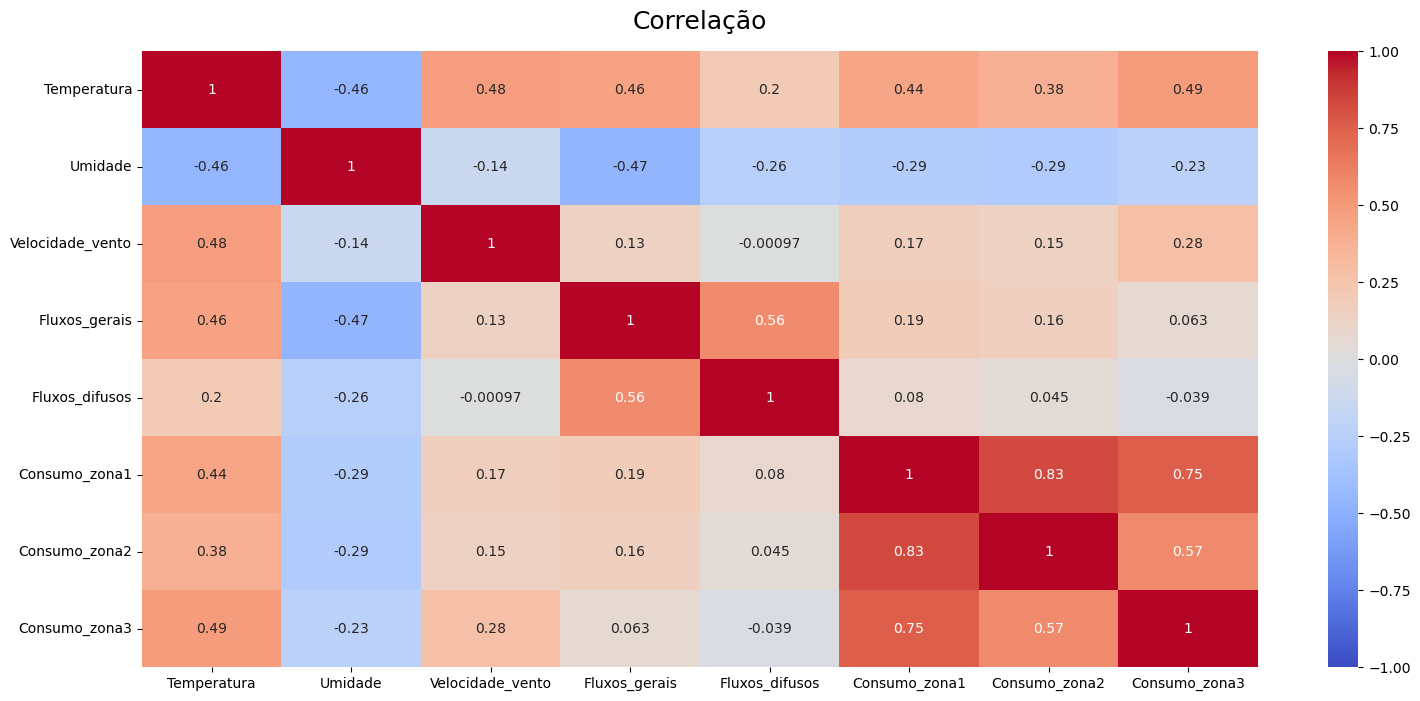

In [15]:
plt.figure(figsize = (18, 8))
heatmap = sns.heatmap(dados.corr(numeric_only = True), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')
heatmap.set_title('Correlação', fontdict = {'fontsize':18}, pad = 16);

## Reamostragem:

In [16]:
dados['Data_e_hora'] = pd.to_datetime(dados['Data_e_hora'])
dados.head()

,Data_e_hora,Temperatura,Umidade,Velocidade_vento,Fluxos_gerais,Fluxos_difusos,Consumo_zona1,Consumo_zona2,Consumo_zona3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [17]:
# Somando os Consumos de energia:
resultado_soma = dados.resample('H', on = 'Data_e_hora').sum()
resultado_soma

,Temperatura,Umidade,Velocidade_vento,Fluxos_gerais,Fluxos_difusos,Consumo_zona1,Consumo_zona2,Consumo_zona3
Data_e_hora,,,,,,,,
2017-01-01 00:00:00,37.181,450.40,0.491,0.381,0.593,175187.84810,108160.48632,115512.28916
2017-01-01 01:00:00,33.293,465.50,0.492,0.341,0.675,147943.29114,96470.51672,102257.34940
2017-01-01 02:00:00,30.326,473.60,0.494,0.378,0.775,132498.22784,85984.19453,94056.86747
2017-01-01 03:00:00,30.026,462.50,0.497,0.359,0.846,124866.83544,79316.71732,89303.13253
2017-01-01 04:00:00,30.586,444.30,0.494,0.348,0.737,122855.69620,77529.48328,85902.65060
...,...,...,...,...,...,...,...,...
2017-12-30 19:00:00,56.720,374.44,0.448,0.312,0.612,225082.88974,194986.19208,101560.62425
2017-12-30 20:00:00,54.250,383.94,0.482,0.316,0.630,222053.23193,192121.50966,101992.79712
2017-12-30 21:00:00,48.070,418.05,0.489,0.439,0.590,212149.04943,184547.40718,99653.30132


In [18]:
resultado_soma.drop(['Temperatura','Umidade','Velocidade_vento','Fluxos_gerais','Fluxos_difusos'], axis = 1, inplace = True)
resultado_soma.head()

,Consumo_zona1,Consumo_zona2,Consumo_zona3
Data_e_hora,,,
2017-01-01 00:00:00,175187.84810,108160.48632,115512.28916
2017-01-01 01:00:00,147943.29114,96470.51672,102257.34940
2017-01-01 02:00:00,132498.22784,85984.19453,94056.86747
2017-01-01 03:00:00,124866.83544,79316.71732,89303.13253
2017-01-01 04:00:00,122855.69620,77529.48328,85902.65060


In [19]:
# Média por hora:
resultado_media = dados.resample('H', on = 'Data_e_hora').mean()
resultado_media

,Temperatura,Umidade,Velocidade_vento,Fluxos_gerais,Fluxos_difusos,Consumo_zona1,Consumo_zona2,Consumo_zona3
Data_e_hora,,,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,18026.747720,19252.048193
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,16078.419453,17042.891567
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,14330.699088,15676.144578
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,13219.452887,14883.855422
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,12921.580547,14317.108433
...,...,...,...,...,...,...,...,...
2017-12-30 19:00:00,9.453333,62.406667,0.074667,0.052000,0.102000,37513.814957,32497.698680,16926.770708
2017-12-30 20:00:00,9.041667,63.990000,0.080333,0.052667,0.105000,37008.871988,32020.251610,16998.799520
2017-12-30 21:00:00,8.011667,69.675000,0.081500,0.073167,0.098333,35358.174905,30757.901197,16608.883553


In [20]:
resultado_media.drop(['Consumo_zona1','Consumo_zona2','Consumo_zona3'], axis = 1, inplace = True)
resultado_media.head()

,Temperatura,Umidade,Velocidade_vento,Fluxos_gerais,Fluxos_difusos
Data_e_hora,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833


In [21]:
resultado_media = resultado_media.add_suffix('_media')
resultado_media.head()

,Temperatura_media,Umidade_media,Velocidade_vento_media,Fluxos_gerais_media,Fluxos_difusos_media
Data_e_hora,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833


In [22]:
# Mínimo por hora:
resultado_min = dados.resample('H', on = 'Data_e_hora').min()
resultado_min

,Temperatura,Umidade,Velocidade_vento,Fluxos_gerais,Fluxos_difusos,Consumo_zona1,Consumo_zona2,Consumo_zona3
Data_e_hora,,,,,,,,
2017-01-01 00:00:00,5.853,73.80,0.080,0.048,0.085,26624.81013,16128.87538,18130.12048
2017-01-01 01:00:00,5.471,76.70,0.080,0.048,0.093,23544.30380,15213.37386,16395.18072
2017-01-01 02:00:00,4.897,78.50,0.081,0.051,0.096,21484.55696,13612.15805,15336.86747
2017-01-01 03:00:00,4.805,76.20,0.081,0.051,0.108,20421.26582,12908.20669,14590.84337
2017-01-01 04:00:00,4.753,71.90,0.079,0.037,0.096,20311.89873,12820.66869,14157.10843
...,...,...,...,...,...,...,...,...
2017-12-30 19:00:00,9.170,61.15,0.072,0.037,0.089,37183.26996,32214.78981,16825.93037
2017-12-30 20:00:00,8.790,63.38,0.073,0.022,0.085,36623.57414,31806.07548,16929.65186
2017-12-30 21:00:00,7.640,65.49,0.080,0.062,0.078,34469.96198,29688.86161,16180.55222


In [23]:
def reamostragem(df, sufixo):
    df.drop(['Consumo_zona1','Consumo_zona2','Consumo_zona3'], axis = 1, inplace = True)
    df = df.add_suffix(sufixo)
    return df.head()

In [24]:
reamostragem(resultado_min, '_min')

,Temperatura_min,Umidade_min,Velocidade_vento_min,Fluxos_gerais_min,Fluxos_difusos_min
Data_e_hora,,,,,
2017-01-01 00:00:00,5.853,73.8,0.080,0.048,0.085
2017-01-01 01:00:00,5.471,76.7,0.080,0.048,0.093
2017-01-01 02:00:00,4.897,78.5,0.081,0.051,0.096
2017-01-01 03:00:00,4.805,76.2,0.081,0.051,0.108
2017-01-01 04:00:00,4.753,71.9,0.079,0.037,0.096


In [25]:
# Máximo por hora:
resultado_max = dados.resample('H', on = 'Data_e_hora').max()
resultado_max

,Temperatura,Umidade,Velocidade_vento,Fluxos_gerais,Fluxos_difusos,Consumo_zona1,Consumo_zona2,Consumo_zona3
Data_e_hora,,,,,,,,
2017-01-01 00:00:00,6.559,76.90,0.083,0.091,0.119,34055.69620,19375.07599,20240.96386
2017-01-01 01:00:00,5.678,78.20,0.085,0.066,0.141,25998.98734,16993.31307,17945.06024
2017-01-01 02:00:00,5.407,79.70,0.084,0.070,0.163,23003.54430,15169.60486,16117.59036
2017-01-01 03:00:00,5.169,77.90,0.085,0.070,0.185,21107.84810,13535.56231,15140.24096
2017-01-01 04:00:00,5.394,75.70,0.085,0.073,0.148,20530.63291,13032.21884,14585.06024
...,...,...,...,...,...,...,...,...
2017-12-30 19:00:00,9.920,63.35,0.078,0.062,0.119,37694.29658,32814.97392,17004.56182
2017-12-30 20:00:00,9.370,64.75,0.088,0.073,0.145,37195.43726,32373.12059,17137.09484
2017-12-30 21:00:00,8.800,71.70,0.082,0.088,0.134,36343.72624,31345.81160,16877.79112


In [26]:
reamostragem(resultado_max, 'max_')

,Temperaturamax_,Umidademax_,Velocidade_ventomax_,Fluxos_geraismax_,Fluxos_difusosmax_
Data_e_hora,,,,,
2017-01-01 00:00:00,6.559,76.9,0.083,0.091,0.119
2017-01-01 01:00:00,5.678,78.2,0.085,0.066,0.141
2017-01-01 02:00:00,5.407,79.7,0.084,0.070,0.163
2017-01-01 03:00:00,5.169,77.9,0.085,0.070,0.185
2017-01-01 04:00:00,5.394,75.7,0.085,0.073,0.148


## Unindo os 4 dataframe:

In [27]:
consumo = pd.concat([resultado_min, resultado_media], axis = 1)
consumo.head()

,Temperatura,Umidade,Velocidade_vento,Fluxos_gerais,Fluxos_difusos,Temperatura_media,Umidade_media,Velocidade_vento_media,Fluxos_gerais_media,Fluxos_difusos_media
Data_e_hora,,,,,,,,,,
2017-01-01 00:00:00,5.853,73.8,0.080,0.048,0.085,6.196833,75.066667,0.081833,0.063500,0.098833
2017-01-01 01:00:00,5.471,76.7,0.080,0.048,0.093,5.548833,77.583333,0.082000,0.056833,0.112500
2017-01-01 02:00:00,4.897,78.5,0.081,0.051,0.096,5.054333,78.933333,0.082333,0.063000,0.129167
2017-01-01 03:00:00,4.805,76.2,0.081,0.051,0.108,5.004333,77.083333,0.082833,0.059833,0.141000
2017-01-01 04:00:00,4.753,71.9,0.079,0.037,0.096,5.097667,74.050000,0.082333,0.058000,0.122833


In [28]:
consumo.rename(columns = {'Temperatura':'Temperatura_min',
                          'Umidade':'Umidade_min',
                          'Velocidade_vento':'Velocidade_vento_min',
                          'Fluxos_gerais':'Fluxos_gerais_min',
                          'Fluxos_difusos':'Fluxos_difusos_min'}, inplace = True)

In [29]:
consumo = pd.concat([consumo, resultado_max], axis = 1)
consumo.head()

,Temperatura_min,Umidade_min,Velocidade_vento_min,Fluxos_gerais_min,Fluxos_difusos_min,Temperatura_media,Umidade_media,Velocidade_vento_media,Fluxos_gerais_media,Fluxos_difusos_media,Temperatura,Umidade,Velocidade_vento,Fluxos_gerais,Fluxos_difusos
Data_e_hora,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5.853,73.8,0.080,0.048,0.085,6.196833,75.066667,0.081833,0.063500,0.098833,6.559,76.9,0.083,0.091,0.119
2017-01-01 01:00:00,5.471,76.7,0.080,0.048,0.093,5.548833,77.583333,0.082000,0.056833,0.112500,5.678,78.2,0.085,0.066,0.141
2017-01-01 02:00:00,4.897,78.5,0.081,0.051,0.096,5.054333,78.933333,0.082333,0.063000,0.129167,5.407,79.7,0.084,0.070,0.163
2017-01-01 03:00:00,4.805,76.2,0.081,0.051,0.108,5.004333,77.083333,0.082833,0.059833,0.141000,5.169,77.9,0.085,0.070,0.185
2017-01-01 04:00:00,4.753,71.9,0.079,0.037,0.096,5.097667,74.050000,0.082333,0.058000,0.122833,5.394,75.7,0.085,0.073,0.148


In [30]:
consumo.rename(columns = {'Temperatura':'Temperatura_max',
                          'Umidade':'Umidade_max',
                          'Velocidade_vento':'Velocidade_vento_max',
                          'Fluxos_gerais':'Fluxos_gerais_max',
                          'Fluxos_difusos':'Fluxos_difusos_max'}, inplace = True)

In [31]:
consumo = pd.concat([consumo, resultado_soma], axis = 1)
consumo.head()

,Temperatura_min,Umidade_min,Velocidade_vento_min,Fluxos_gerais_min,Fluxos_difusos_min,Temperatura_media,Umidade_media,Velocidade_vento_media,Fluxos_gerais_media,Fluxos_difusos_media,Temperatura_max,Umidade_max,Velocidade_vento_max,Fluxos_gerais_max,Fluxos_difusos_max,Consumo_zona1,Consumo_zona2,Consumo_zona3
Data_e_hora,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5.853,73.8,0.080,0.048,0.085,6.196833,75.066667,0.081833,0.063500,0.098833,6.559,76.9,0.083,0.091,0.119,175187.84810,108160.48632,115512.28916
2017-01-01 01:00:00,5.471,76.7,0.080,0.048,0.093,5.548833,77.583333,0.082000,0.056833,0.112500,5.678,78.2,0.085,0.066,0.141,147943.29114,96470.51672,102257.34940
2017-01-01 02:00:00,4.897,78.5,0.081,0.051,0.096,5.054333,78.933333,0.082333,0.063000,0.129167,5.407,79.7,0.084,0.070,0.163,132498.22784,85984.19453,94056.86747
2017-01-01 03:00:00,4.805,76.2,0.081,0.051,0.108,5.004333,77.083333,0.082833,0.059833,0.141000,5.169,77.9,0.085,0.070,0.185,124866.83544,79316.71732,89303.13253
2017-01-01 04:00:00,4.753,71.9,0.079,0.037,0.096,5.097667,74.050000,0.082333,0.058000,0.122833,5.394,75.7,0.085,0.073,0.148,122855.69620,77529.48328,85902.65060


## Adição da coluna Fim_de_semana:

In [32]:
consumo.reset_index(inplace = True)
consumo.head()

,Data_e_hora,Temperatura_min,Umidade_min,Velocidade_vento_min,Fluxos_gerais_min,Fluxos_difusos_min,Temperatura_media,Umidade_media,Velocidade_vento_media,Fluxos_gerais_media,Fluxos_difusos_media,Temperatura_max,Umidade_max,Velocidade_vento_max,Fluxos_gerais_max,Fluxos_difusos_max,Consumo_zona1,Consumo_zona2,Consumo_zona3
0,2017-01-01 00:00:00,5.853,73.8,0.080,0.048,0.085,6.196833,75.066667,0.081833,0.063500,0.098833,6.559,76.9,0.083,0.091,0.119,175187.84810,108160.48632,115512.28916
1,2017-01-01 01:00:00,5.471,76.7,0.080,0.048,0.093,5.548833,77.583333,0.082000,0.056833,0.112500,5.678,78.2,0.085,0.066,0.141,147943.29114,96470.51672,102257.34940
2,2017-01-01 02:00:00,4.897,78.5,0.081,0.051,0.096,5.054333,78.933333,0.082333,0.063000,0.129167,5.407,79.7,0.084,0.070,0.163,132498.22784,85984.19453,94056.86747
3,2017-01-01 03:00:00,4.805,76.2,0.081,0.051,0.108,5.004333,77.083333,0.082833,0.059833,0.141000,5.169,77.9,0.085,0.070,0.185,124866.83544,79316.71732,89303.13253
4,2017-01-01 04:00:00,4.753,71.9,0.079,0.037,0.096,5.097667,74.050000,0.082333,0.058000,0.122833,5.394,75.7,0.085,0.073,0.148,122855.69620,77529.48328,85902.65060


In [33]:
def se_fim_de_semana(date):
    if date.weekday() >= 5:
        return 1
    else:
        return 0
    
consumo['Fim_de_semana'] = consumo['Data_e_hora'].apply(se_fim_de_semana)
consumo.head()

,Data_e_hora,Temperatura_min,Umidade_min,Velocidade_vento_min,Fluxos_gerais_min,Fluxos_difusos_min,Temperatura_media,Umidade_media,Velocidade_vento_media,Fluxos_gerais_media,Fluxos_difusos_media,Temperatura_max,Umidade_max,Velocidade_vento_max,Fluxos_gerais_max,Fluxos_difusos_max,Consumo_zona1,Consumo_zona2,Consumo_zona3,Fim_de_semana
0,2017-01-01 00:00:00,5.853,73.8,0.080,0.048,0.085,6.196833,75.066667,0.081833,0.063500,0.098833,6.559,76.9,0.083,0.091,0.119,175187.84810,108160.48632,115512.28916,1
1,2017-01-01 01:00:00,5.471,76.7,0.080,0.048,0.093,5.548833,77.583333,0.082000,0.056833,0.112500,5.678,78.2,0.085,0.066,0.141,147943.29114,96470.51672,102257.34940,1
2,2017-01-01 02:00:00,4.897,78.5,0.081,0.051,0.096,5.054333,78.933333,0.082333,0.063000,0.129167,5.407,79.7,0.084,0.070,0.163,132498.22784,85984.19453,94056.86747,1
3,2017-01-01 03:00:00,4.805,76.2,0.081,0.051,0.108,5.004333,77.083333,0.082833,0.059833,0.141000,5.169,77.9,0.085,0.070,0.185,124866.83544,79316.71732,89303.13253,1
4,2017-01-01 04:00:00,4.753,71.9,0.079,0.037,0.096,5.097667,74.050000,0.082333,0.058000,0.122833,5.394,75.7,0.085,0.073,0.148,122855.69620,77529.48328,85902.65060,1


## Nova correlação:

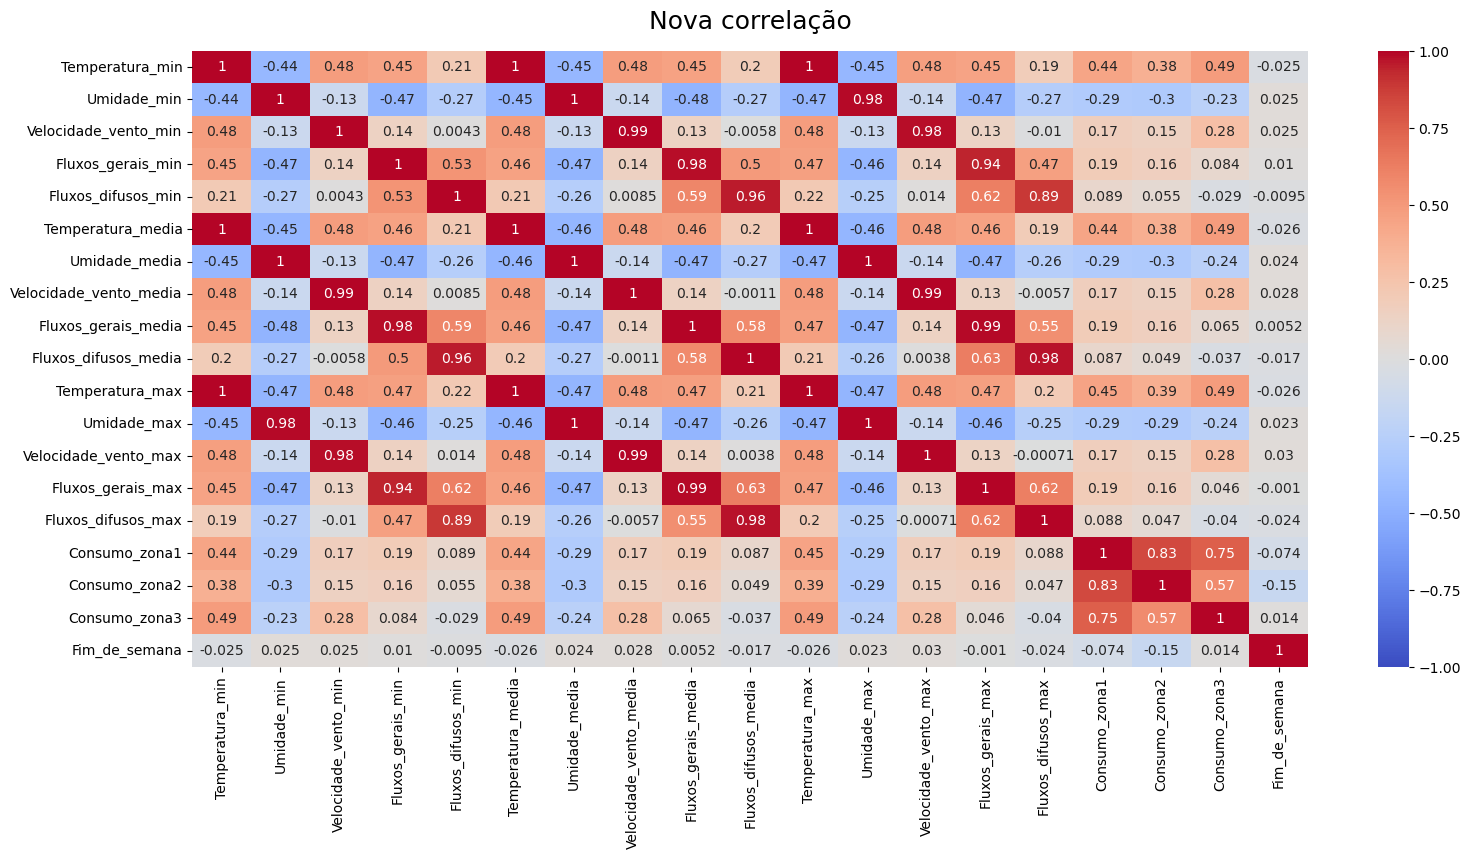

In [34]:
plt.figure(figsize = (18, 8))
heatmap = sns.heatmap(consumo.corr(numeric_only = True), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')
heatmap.set_title('Nova correlação', fontdict = {'fontsize':18}, pad = 16);

# Estimando um Modelo de Regressão Linear para o Consumo da Zona 3:

O reajuste de valores não apresentou uma diferença significativa, então decidi usar os dados na forma original. Por hora, achei melhor criar um Modelo de Regressão para o consumo da Zona 3, pois ela apresentou valores maiores na **Temperatura** e **Velocidade do vento**, e um valor menor na **Umidade**.

In [35]:
dados.corr(numeric_only = True).round(4)

,Temperatura,Umidade,Velocidade_vento,Fluxos_gerais,Fluxos_difusos,Consumo_zona1,Consumo_zona2,Consumo_zona3
Temperatura,1.0000,-0.4602,0.4771,0.4603,0.1965,0.4402,0.3824,0.4895
Umidade,-0.4602,1.0000,-0.1359,-0.4681,-0.2569,-0.2874,-0.2950,-0.2330
Velocidade_vento,0.4771,-0.1359,1.0000,0.1337,-0.0010,0.1674,0.1464,0.2786
Fluxos_gerais,0.4603,-0.4681,0.1337,1.0000,0.5647,0.1880,0.1572,0.0634
Fluxos_difusos,0.1965,-0.2569,-0.0010,0.5647,1.0000,0.0803,0.0447,-0.0385
Consumo_zona1,0.4402,-0.2874,0.1674,0.1880,0.0803,1.0000,0.8345,0.7507
Consumo_zona2,0.3824,-0.2950,0.1464,0.1572,0.0447,0.8345,1.0000,0.5709
Consumo_zona3,0.4895,-0.2330,0.2786,0.0634,-0.0385,0.7507,0.5709,1.0000


## Importando o *train_test_split* do Scikit-learn:

In [36]:
from sklearn.model_selection import train_test_split

## Armazenando a variável Dependente (**Consumo_zona3**) em uma *Series* e as variáveis Explicativas (**Temperatura**, **Umidade** e **Velocidade_vento**) em um DataFrame:

In [37]:
y = dados['Consumo_zona3']

X = dados[['Temperatura', 'Umidade', 'Velocidade_vento']]

## Criando os datasets de Treino e Teste:

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

## Importando *LinearRegression* e *metrics*:

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [40]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.238


## Trocando *Umidade* por *Fluxos_gerais*:

In [41]:
X = dados[['Temperatura', 'Velocidade_vento', 'Fluxos_gerais']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
modelo2 = LinearRegression()
modelo2.fit(X_train, y_train)
print('R² = {}'.format(modelo2.score(X_train, y_train).round(3)))

R² = 0.271


In [42]:
y_previsto2 = modelo2.predict(X_test)
print('R² = %s' % metrics.r2_score(y_test, y_previsto2).round(3))

R² = 0.282


## Obtendo previsões pontuais:

In [43]:
entrada = X_test[0:1]
entrada

,Temperatura,Velocidade_vento,Fluxos_gerais
27574,27.44,4.908,818.0


In [55]:
modelo2.predict(entrada)[0]

20408.796373681267

In [52]:
dados.loc[27574]

Data_e_hora         2017-07-11 11:40:00
Temperatura                       27.44
Umidade                            63.6
Velocidade_vento                  4.908
Fluxos_gerais                     818.0
Fluxos_difusos                     82.3
Consumo_zona1               40709.10299
Consumo_zona2               27246.83544
Consumo_zona3               27986.61088
Name: 27574, dtype: object

---

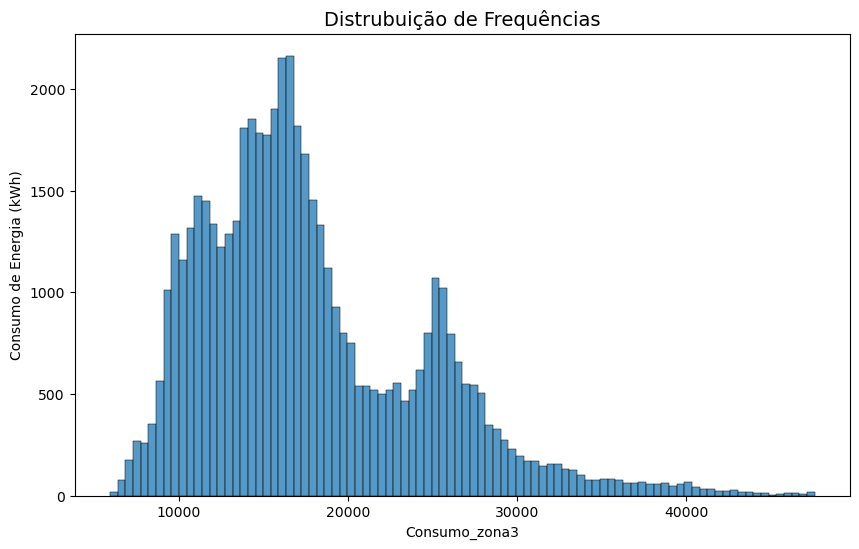

In [51]:
ax = sns.histplot(dados['Consumo_zona3'])
ax.figure.set_size_inches(10, 6)
ax.set_title('Distrubuição de Frequências', fontsize = 14)
ax.set_ylabel('Consumo de Energia (kWh)')
ax;